## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [13]:
print(x_train.shape)

(60000, 28, 28, 1)


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
469/469 [==============================] - 97s 112ms/step - loss: 0.1269 - accuracy: 0.9621 - val_loss: 0.0584 - val_accuracy: 0.9816
Epoch 2/15
469/469 [==============================] - 50s 107ms/step - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0441 - val_accuracy: 0.9850
Epoch 3/15
469/469 [==============================] - 51s 110ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 4/15
469/469 [==============================] - 55s 117ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0345 - val_accuracy: 0.9882
Epoch 5/15
469/469 [==============================] - 50s 107ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 6/15
469/469 [==============================] - 50s 107ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0337 - val_accuracy: 0.9885
Epoch 7/15
469/469 [==============================] - 50s 107ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0292 - val_ac

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
model.save('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/CNN/cnn-mnist.h5')

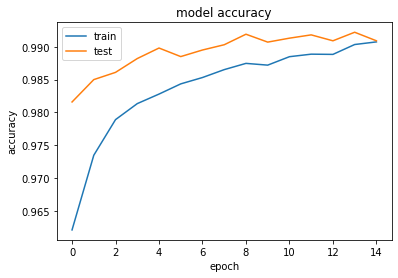

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

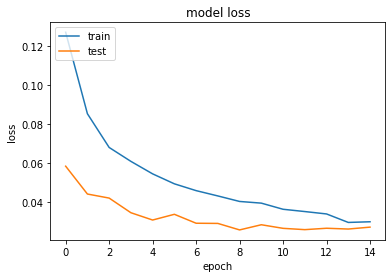

In [11]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [18]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [20]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[7 2 1 ... 4 5 6]
